# Notes for 14 November

Today we'll think about programming some simple signal processing.

A BME student might have some sort of sensor that provides noisy measurements. How can she process the data she gets to reduce the noise?

In [1]:
import numpy as np
%matplotlib inline
import pylab

## Example data

Our data might look something like this with 1000 samples per second and some random noise superimposed on it.

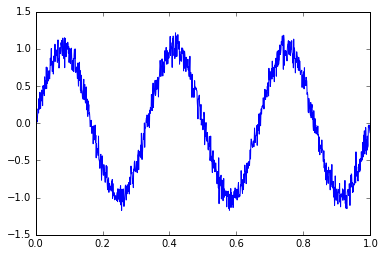

In [2]:
t = np.arange(0, 1, 0.001) # t is our x-axis times
s = np.sin(2 * np.pi * 3 * t) + 0.1 * np.random.randn(1000) # s is our fake signal
pylab.plot(t, s) # plot s vs t

## Exponential smoothing

Exponential smoothing is a method for removing some kinds of noise from data. Given a parameter $\alpha$ (0 to 1) and an input array $X$ it produces a new array $R$ like this:

$R_0 = X_0$

$R_i = \alpha X_i + (1 - \alpha) R_{i-1} $ for $i \geq 1$

Write a function esmooth(X, alpha) that computes this result.

Things to think about.

* What do I need to do?
* What kind of result do I expect?
* How should it behave for different values of alpha?
* Can I do a small example without the computer?

Let's use some easy values like:
X = [ 1, 3, 2, 4 ] and alpha = 0.5

    R[0] = 1  
    R[1] = 0.5 \* 3 + 0.5 \* 1 = 2  
    R[2] = 0.5 \* 2 + 0.5 \* 2 = 2  
    R[3] = 0.5 \* 4 + 0.5 \* 2 = 3

    R = [ 1, 2, 2, 3 ]


In [3]:
def esmooth(X, alpha):
    '''Exponential smoothing of array X with parameter alpha'''
    R = np.zeros_like(X)
    R[0] = X[0]
    for i in range(1, len(X)):
        R[i] = alpha * X[i] + (1 - alpha) * R[i-1]
    return R

# Try our function on some data

In [4]:
esmooth([1,3,2,4], 0.5)

array([1, 2, 2, 3])

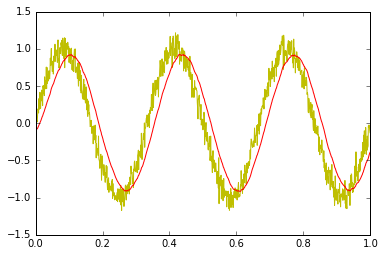

In [5]:
ss = esmooth(s, 0.04)
pylab.plot(t, s, 'y')
pylab.plot(t, ss, 'r')

# Dealing with delay

Methods such as exponential smoothing invariably distort our data by introducing delays. This may not matter but for some applications it does. What can we do?

Write a function bdesmooth that takes the same parameters as esmooth but smooths in both directions to avoid introducing delay.

How can we work in both directions? How about reverse the input, apply the function, and reverse the output?

In [6]:
foo = np.array([1,2,3,4])
foo[::-1]

array([4, 3, 2, 1])

In [23]:
def bdesmooth(X, alpha):
    '''Exponential smoothing in both directions'''
    # take the square root of alpha because it will be applied twice
    sqralpha = np.sqrt(alpha)
    # do something here
    R = esmooth(X, sqralpha)
    R = esmooth(R[::-1], sqralpha)
    R = R[::-1]
    return R


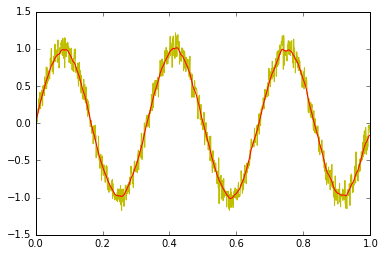

In [8]:
bs = bdesmooth(s, 0.02)
pylab.plot(t, s, 'y')
pylab.plot(t, bs, 'r')

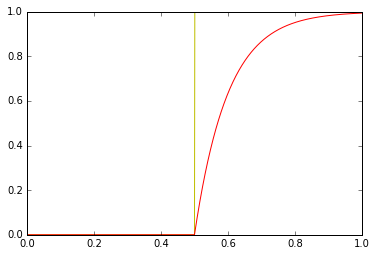

In [19]:
s = np.array((t > 0.5), dtype=float)
ss = esmooth(s, 0.01)
pylab.plot(t, s, 'y')
pylab.plot(t, ss, 'r')

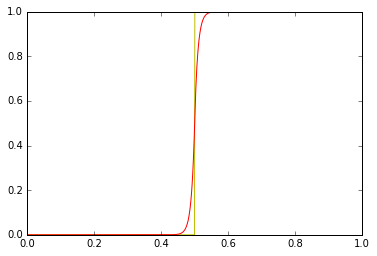

In [24]:
s = np.array((t > 0.5), dtype=float)
bs = bdesmooth(s, 0.01)
pylab.plot(t, s, 'y')
pylab.plot(t, bs, 'r')

In [16]:
ss

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,